ФБ-25 Ярош Костянтин
Лаб 4

LEVEL 1

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
ihepc = fetch_ucirepo(id=235) 

c:\Users\yaros\AppData\Local\Programs\Python\Python311\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [2]:
df = ihepc.data.features
np_array = np.array(df.values)
print(np_array)
print(df)
print(type(df['Global_active_power'][7]))

[['16/12/2006' '17:24:00' '4.216' ... '0.000' '1.000' 17.0]
 ['16/12/2006' '17:25:00' '5.360' ... '0.000' '1.000' 16.0]
 ['16/12/2006' '17:26:00' '5.374' ... '0.000' '2.000' 17.0]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0 0.0]]
               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                  

Так як вони у форматі str треба перевести їх у формат чисел та прибрати рядки з пропущеними даними

In [3]:
df = df.dropna()
df[df.columns.difference(['Date', 'Time'])] = df[df.columns.difference(['Date', 'Time'])].apply(pd.to_numeric)
print(df)

C:\Users\yaros\AppData\Local\Temp\ipykernel_6860\1510183705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns.difference(['Date', 'Time'])] = df[df.columns.difference(['Date', 'Time'])].apply(pd.to_numeric)


               Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0    

In [4]:

np_array = np_array[np.all(np_array != '?', axis=1)]
np_array[:, 2:] = np_array[:, 2:].astype(float)
print(np_array)

[['16/12/2006' '17:24:00' 4.216 ... 0.0 1.0 17.0]
 ['16/12/2006' '17:25:00' 5.36 ... 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... 0.0 2.0 17.0]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0 0.0]]


Обрати всі домогосподарства, у яких загальна активна споживана
потужність перевищує 5 кВт.

In [5]:
print(df[df['Global_active_power'] > 5])

               Date      Time  Global_active_power  Global_reactive_power  \
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
11       16/12/2006  17:35:00                5.412                  0.470   
12       16/12/2006  17:36:00                5.224                  0.478   
...             ...       ...                  ...                    ...   
2069356  22/11/2010  18:40:00                5.408                  0.150   
2069357  22/11/2010  18:41:00                5.528                  0.144   
2071586  24/11/2010  07:50:00                5.172                  0.050   
2071587  24/11/2010  07:51:00                5.750                  0.000   
2072997  25/11/2010  07:21:00                5.074                  0.240   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1    

In [6]:
print(np_array[np_array[:, 2] > 5])

[['16/12/2006' '17:25:00' 5.36 ... 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:27:00' 5.388 ... 0.0 1.0 17.0]
 ...
 ['24/11/2010' '07:50:00' 5.172 ... 0.0 38.0 17.0]
 ['24/11/2010' '07:51:00' 5.75 ... 0.0 39.0 17.0]
 ['25/11/2010' '07:21:00' 5.074 ... 1.0 2.0 18.0]]


Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [7]:
print(df[df['Voltage'] >  235])

               Date      Time  Global_active_power  Global_reactive_power  \
4        16/12/2006  17:28:00                3.666                  0.528   
5        16/12/2006  17:29:00                3.520                  0.522   
6        16/12/2006  17:30:00                3.702                  0.520   
7        16/12/2006  17:31:00                3.700                  0.520   
14       16/12/2006  17:38:00                4.054                  0.422   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
4    

In [8]:
print(np_array[np_array[:, 4] > 235])

[['16/12/2006' '17:28:00' 3.666 ... 0.0 1.0 17.0]
 ['16/12/2006' '17:29:00' 3.52 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:30:00' 3.702 ... 0.0 1.0 17.0]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0 0.0]]


Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [9]:
print(df[(df['Global_intensity'].between(19, 20)) & (df['Sub_metering_2'] > df['Sub_metering_3'])])

               Date      Time  Global_active_power  Global_reactive_power  \
45       16/12/2006  18:09:00                4.464                  0.136   
460      17/12/2006  01:04:00                4.582                  0.258   
464      17/12/2006  01:08:00                4.618                  0.104   
475      17/12/2006  01:19:00                4.636                  0.140   
476      17/12/2006  01:20:00                4.634                  0.152   
...             ...       ...                  ...                    ...   
2071589  24/11/2010  07:53:00                4.666                  0.000   
2071590  24/11/2010  07:54:00                4.694                  0.000   
2071591  24/11/2010  07:55:00                4.602                  0.000   
2071592  24/11/2010  07:56:00                4.536                  0.000   
2071593  24/11/2010  07:57:00                4.626                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
45   

In [10]:
print(np_array[(np_array[:, 5] >= 19) & (np_array[:, 5] <= 20) & (np_array[:, 7] > np_array[:, 8])])

[['16/12/2006' '18:09:00' 4.464 ... 0.0 37.0 16.0]
 ['17/12/2006' '01:04:00' 4.582 ... 0.0 13.0 0.0]
 ['17/12/2006' '01:08:00' 4.618 ... 0.0 27.0 0.0]
 ...
 ['24/11/2010' '07:55:00' 4.602 ... 0.0 40.0 17.0]
 ['24/11/2010' '07:56:00' 4.536 ... 0.0 39.0 17.0]
 ['24/11/2010' '07:57:00' 4.626 ... 0.0 39.0 17.0]]


Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії, а також

In [11]:

sampled_df = df.sample(n=500000)
print(sampled_df['Sub_metering_1'].mean())
print(sampled_df['Sub_metering_2'].mean())
print(sampled_df['Sub_metering_3'].mean())

1.120652
1.300608
6.467398


In [12]:
import numpy as np
idx = np.random.randint(len(np_array), size=500000)
sampled_np_array = np_array[idx, :]
print(sampled_np_array)
print(np.mean(sampled_np_array[:, 6]))
print(np.mean(sampled_np_array[:, 7]))
print(np.mean(sampled_np_array[:, 8]))

[['27/5/2008' '23:39:00' 0.344 ... 0.0 2.0 0.0]
 ['28/3/2010' '19:57:00' 3.35 ... 0.0 22.0 17.0]
 ['3/5/2009' '01:52:00' 0.324 ... 0.0 0.0 0.0]
 ...
 ['12/10/2009' '19:43:00' 3.26 ... 0.0 2.0 17.0]
 ['20/10/2010' '07:44:00' 3.158 ... 0.0 0.0 19.0]
 ['21/6/2008' '17:57:00' 1.57 ... 0.0 0.0 18.0]]
1.1296
1.289628
6.47113


Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.
проте 6 це загато таких даних просто нема але можемо перевірити це для 3 кВт

In [13]:

df_filtered = df[(df['Time'].str[:2].astype(int) >= 18)]


daily_avg = df_filtered.groupby(df_filtered['Date'])['Global_active_power'].mean()
print(daily_avg)
selected_days = daily_avg[daily_avg > 6]
print(selected_days)
selected_days = daily_avg[daily_avg > 3]
print(selected_days)

Date
1/1/2007     0.655689
1/1/2008     2.197972
1/1/2009     2.122194
1/1/2010     0.463028
1/10/2007    1.893467
               ...   
9/8/2010     0.298461
9/9/2007     2.032689
9/9/2008     0.789228
9/9/2009     1.519094
9/9/2010     1.202728
Name: Global_active_power, Length: 1428, dtype: float64
Series([], Name: Global_active_power, dtype: float64)
Date
1/12/2007     3.723044
1/4/2007      3.255072
10/11/2007    3.563822
10/2/2007     3.784972
10/2/2008     3.030411
12/1/2008     4.022328
12/4/2008     3.716856
13/1/2007     4.236961
13/10/2007    3.017556
14/11/2009    3.106850
15/11/2008    3.741500
16/1/2009     3.924511
16/2/2008     3.109989
17/11/2007    3.465767
18/1/2009     3.478444
18/10/2008    3.226572
19/2/2007     3.407506
2/2/2008      4.190183
20/1/2007     3.001394
20/12/2006    3.124622
20/2/2008     3.127217
21/1/2007     3.973400
21/11/2009    3.098283
22/11/2009    3.226211
22/12/2006    3.365689
22/12/2007    3.176750
22/2/2007     3.734531
22/2/2009     3.5

In [29]:
np_filtered = np_array[np_array[:, 1].astype('U2').astype(int) >= 18]
unique_dates = np.unique(np_filtered[:, 0])
np_daily_avgs = []
for unique in unique_dates:
    np_daily_avgs.append([unique, np.mean(np_filtered[np_filtered[:, 0] == unique][:, 2])])
np_daily_avgs = np.array(np_daily_avgs)
print(np_daily_avgs)
np_selected_days = np_daily_avgs[np_daily_avgs[:, 1].astype(float) > 6]
print(selected_days)
np_selected_days = np_daily_avgs[np_daily_avgs[:, 1].astype(float)  > 3]
print(selected_days)


[['1/1/2007' '0.6556888888888888']
 ['1/1/2008' '2.197972222222221']
 ['1/1/2009' '2.1221944444444456']
 ...
 ['9/9/2008' '0.7892277777777772']
 ['9/9/2009' '1.5190944444444447']
 ['9/9/2010' '1.202727777777778']]
Date
1/12/2007     3.723044
1/4/2007      3.255072
10/11/2007    3.563822
10/2/2007     3.784972
10/2/2008     3.030411
12/1/2008     4.022328
12/4/2008     3.716856
13/1/2007     4.236961
13/10/2007    3.017556
14/11/2009    3.106850
15/11/2008    3.741500
16/1/2009     3.924511
16/2/2008     3.109989
17/11/2007    3.465767
18/1/2009     3.478444
18/10/2008    3.226572
19/2/2007     3.407506
2/2/2008      4.190183
20/1/2007     3.001394
20/12/2006    3.124622
20/2/2008     3.127217
21/1/2007     3.973400
21/11/2009    3.098283
22/11/2009    3.226211
22/12/2006    3.365689
22/12/2007    3.176750
22/2/2007     3.734531
22/2/2009     3.575172
23/1/2010     3.332033
23/11/2008    4.418233
23/12/2006    4.226244
23/12/2007    3.098683
24/10/2008    3.100433
24/10/2009    3.168250

In [39]:
daily_avg_1 = df_filtered.groupby(df_filtered['Date'])['Sub_metering_1'].sum()
daily_avg_2 = df_filtered.groupby(df_filtered['Date'])['Sub_metering_2'].sum()
daily_avg_3 = df_filtered.groupby(df_filtered['Date'])['Sub_metering_3'].sum()
where_avg_2_bigger = daily_avg_2[(daily_avg_2 > daily_avg_1) & (daily_avg_2 > daily_avg_3)].index
print(daily_avg_2)
where_avg_2_bigger_and_active_past_18 = selected_days[(selected_days.index.isin(where_avg_2_bigger))].index
print(where_avg_2_bigger_and_active_past_18)


Date
1/1/2007       71.0
1/1/2008       56.0
1/1/2009     3662.0
1/1/2010       86.0
1/10/2007     181.0
              ...  
9/8/2010      143.0
9/9/2007     1769.0
9/9/2008       93.0
9/9/2009      160.0
9/9/2010     1412.0
Name: Sub_metering_2, Length: 1428, dtype: float64
Index(['22/2/2009', '4/3/2007', '5/3/2007', '5/3/2008'], dtype='object', name='Date')


In [42]:
np_daily_avg_1 = []
for unique in unique_dates:
    np_daily_avg_1.append([unique, np.sum(np_filtered[np_filtered[:, 0] == unique][:, 6])])
np_daily_avg_1 = np.array(np_daily_avg_1)

np_daily_avg_2 = []
for unique in unique_dates:
    np_daily_avg_2.append([unique, np.sum(np_filtered[np_filtered[:, 0] == unique][:, 7])])
np_daily_avg_2 = np.array(np_daily_avg_2)

np_daily_avg_3 = []
for unique in unique_dates:
    np_daily_avg_3.append([unique, np.sum(np_filtered[np_filtered[:, 0] == unique][:, 8])])
np_daily_avg_3 = np.array(np_daily_avg_3)

np_where_avg_2_bigger = np_daily_avg_2[(np_daily_avg_2[:, 1].astype(float) > np_daily_avg_1[:, 1].astype(float)) & (np_daily_avg_2[:, 1].astype(float) > np_daily_avg_3[:, 1].astype(float))][:, 0]

np_where_avg_2_bigger_and_active_past_18 = np_selected_days[np.isin(np_selected_days[:, 0], np_where_avg_2_bigger)][:, 0] 
print(np_where_avg_2_bigger_and_active_past_18)

[['1/1/2007' '71.0']
 ['1/1/2008' '56.0']
 ['1/1/2009' '3662.0']
 ...
 ['9/9/2008' '93.0']
 ['9/9/2009' '160.0']
 ['9/9/2010' '1412.0']]
151
['22/2/2009' '4/3/2007' '5/3/2007' '5/3/2008']


Підянимо інформацію з основної таблички

In [44]:
full_where_avg_2_bigger_and_active_past_18 = df_filtered[df_filtered['Date'].isin(where_avg_2_bigger_and_active_past_18)]
print(full_where_avg_2_bigger_and_active_past_18)

              Date      Time  Global_active_power  Global_reactive_power  \
112356    4/3/2007  18:00:00                4.816                  0.420   
112357    4/3/2007  18:01:00                3.702                  0.450   
112358    4/3/2007  18:02:00                4.544                  0.414   
112359    4/3/2007  18:03:00                4.516                  0.434   
112360    4/3/2007  18:04:00                3.712                  0.432   
...            ...       ...                  ...                    ...   
1150951  22/2/2009  23:55:00                1.800                  0.096   
1150952  22/2/2009  23:56:00                1.864                  0.150   
1150953  22/2/2009  23:57:00                1.866                  0.200   
1150954  22/2/2009  23:58:00                1.884                  0.206   
1150955  22/2/2009  23:59:00                1.866                  0.200   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
112356    237.12 

In [43]:
np_full_where_avg_2_bigger_and_active_past_18 = np_filtered[np.isin(np_filtered[:, 0], np_where_avg_2_bigger_and_active_past_18)]
print(np_full_where_avg_2_bigger_and_active_past_18)

[['4/3/2007' '18:00:00' 4.816 ... 0.0 36.0 17.0]
 ['4/3/2007' '18:01:00' 3.702 ... 1.0 19.0 17.0]
 ['4/3/2007' '18:02:00' 4.544 ... 0.0 30.0 17.0]
 ...
 ['22/2/2009' '23:57:00' 1.866 ... 0.0 0.0 0.0]
 ['22/2/2009' '23:58:00' 1.884 ... 0.0 0.0 0.0]
 ['22/2/2009' '23:59:00' 1.866 ... 0.0 0.0 0.0]]


In [54]:
half_point = len(full_where_avg_2_bigger_and_active_past_18) // 2
first_half = full_where_avg_2_bigger_and_active_past_18.iloc[:half_point]
second_half = full_where_avg_2_bigger_and_active_past_18.iloc[half_point:]


selected_first_half = first_half.iloc[::3]

selected_second_half = second_half.iloc[::4]

selected_df = pd.concat([selected_first_half, selected_second_half])

print(selected_df)

              Date      Time  Global_active_power  Global_reactive_power  \
112356    4/3/2007  18:00:00                4.816                  0.420   
112359    4/3/2007  18:03:00                4.516                  0.434   
112362    4/3/2007  18:06:00                3.820                  0.416   
112365    4/3/2007  18:09:00                3.642                  0.318   
112368    4/3/2007  18:12:00                4.302                  0.148   
...            ...       ...                  ...                    ...   
1150936  22/2/2009  23:40:00                2.910                  0.000   
1150940  22/2/2009  23:44:00                2.710                  0.074   
1150944  22/2/2009  23:48:00                1.814                  0.048   
1150948  22/2/2009  23:52:00                1.850                  0.104   
1150952  22/2/2009  23:56:00                1.864                  0.150   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
112356    237.12 

In [61]:
np_half_point = len(np_full_where_avg_2_bigger_and_active_past_18) // 2
np_first_half = np_full_where_avg_2_bigger_and_active_past_18[:np_half_point]
np_second_half = np_full_where_avg_2_bigger_and_active_past_18[np_half_point:]


np_selected_first_half = np_first_half[::3]

np_selected_second_half = np_second_half[::4]
np_selected_df = np.concatenate((np_selected_first_half , np_selected_second_half))

print(np_selected_df)

[['4/3/2007' '18:00:00' 4.816 ... 0.0 36.0 17.0]
 ['4/3/2007' '18:03:00' 4.516 ... 1.0 33.0 18.0]
 ['4/3/2007' '18:06:00' 3.82 ... 0.0 22.0 17.0]
 ...
 ['22/2/2009' '23:48:00' 1.814 ... 0.0 0.0 0.0]
 ['22/2/2009' '23:52:00' 1.85 ... 0.0 0.0 0.0]
 ['22/2/2009' '23:56:00' 1.864 ... 0.0 1.0 0.0]]



LEVEL 2

Використаний дата сет:

Donated on 7/6/1993
Revised from CMU StatLib library, data concerns city-cycle fuel consumption

Dataset Characteristics
Multivariate

Feature Type
Real, Categorical, Integer

Instances
398


Так як при скачуванні з ucimlrepo одразу качаються pandas dataframe тому і почнемо ми з них.

In [96]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

auto_mpg = fetch_ucirepo(id=9) 
df = pd.concat([auto_mpg.data.ids, auto_mpg.data.features], axis=1)
np_array = np.array(auto_mpg.data.features, dtype='float64')
np_array = np.concatenate((auto_mpg.data.ids, np_array), axis=1)
print(df)
print(np_array)

                      car_name  displacement  cylinders  horsepower  weight  \
0    chevrolet,chevelle,malibu         307.0          8       130.0    3504   
1            buick,skylark,320         350.0          8       165.0    3693   
2           plymouth,satellite         318.0          8       150.0    3436   
3                amc,rebel,sst         304.0          8       150.0    3433   
4                  ford,torino         302.0          8       140.0    3449   
..                         ...           ...        ...         ...     ...   
393            ford,mustang,gl         140.0          4        86.0    2790   
394                  vw,pickup          97.0          4        52.0    2130   
395              dodge,rampage         135.0          4        84.0    2295   
396                ford,ranger         120.0          4        79.0    2625   
397                 chevy,s-10         119.0          4        82.0    2720   

     acceleration  model_year  origin  
0          

In [37]:
print(df.isnull().sum())
print(df[df.isna().any(axis=1)])

car_name        0
displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64
                 car_name  displacement  cylinders  horsepower  weight  \
32             ford,pinto          98.0          4         NaN    2046   
126         ford,maverick         200.0          6         NaN    2875   
330  renault,lecar,deluxe          85.0          4         NaN    1835   
336    ford,mustang,cobra         140.0          4         NaN    2905   
354           renault,18i         100.0          4         NaN    2320   
374        amc,concord,dl         151.0          4         NaN    3035   

     acceleration  model_year  origin  
32           19.0          71       1  
126          17.0          74       1  
330          17.3          80       2  
336          14.3          80       1  
354          15.8          81       2  
374          20.5          82       1  


Як бачимо є пропущені дані у horsepower

In [15]:
print(len(df))
df = df.dropna(axis=0)
print(len(df))
print(df.isnull().sum())

392
392
car_name        0
displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [110]:

temp = np_array
print(np_array[:, 1:])
print(type(np_array[0][3]))
np_array = np_array[~pd.isna(np_array).any(axis=1)] #np.isnan doesnt work for object lists and we have ibject list cuz of first column
print(len(np_array))
print(np_array) 

[[307.0 8.0 130.0 ... 12.0 70.0 1.0]
 [350.0 8.0 165.0 ... 11.5 70.0 1.0]
 [318.0 8.0 150.0 ... 11.0 70.0 1.0]
 ...
 [135.0 4.0 84.0 ... 11.6 82.0 1.0]
 [120.0 4.0 79.0 ... 18.6 82.0 1.0]
 [119.0 4.0 82.0 ... 19.4 82.0 1.0]]
<class 'float'>
392
[['chevrolet,chevelle,malibu' 307.0 8.0 ... 12.0 70.0 1.0]
 ['buick,skylark,320' 350.0 8.0 ... 11.5 70.0 1.0]
 ['plymouth,satellite' 318.0 8.0 ... 11.0 70.0 1.0]
 ...
 ['dodge,rampage' 135.0 4.0 ... 11.6 82.0 1.0]
 ['ford,ranger' 120.0 4.0 ... 18.6 82.0 1.0]
 ['chevy,s-10' 119.0 4.0 ... 19.4 82.0 1.0]]


Тепер пропущених даних нема

In [112]:
def normalize(dataset):
    # Проводимо нормалізацію
    min_vals = dataset.min(axis=0)
    max_vals = dataset.max(axis=0)
    normalized = (dataset - min_vals) / (max_vals - min_vals)
    return normalized
normalized_df = df
normalized_df[df.columns.difference(['car_name'])] = normalize(df[df.columns.difference(['car_name'])])
normalized_df

,car_name,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,"chevrolet,chevelle,malibu",0.617571,1.0,0.456522,0.536150,0.238095,0.0,0.0
1,"buick,skylark,320",0.728682,1.0,0.646739,0.589736,0.208333,0.0,0.0
2,"plymouth,satellite",0.645995,1.0,0.565217,0.516870,0.178571,0.0,0.0
3,"amc,rebel,sst",0.609819,1.0,0.565217,0.516019,0.238095,0.0,0.0
4,"ford,torino",0.604651,1.0,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",0.186047,0.2,0.217391,0.333711,0.452381,1.0,0.0
394,"vw,pickup",0.074935,0.2,0.032609,0.146583,0.988095,1.0,0.5
395,"dodge,rampage",0.173127,0.2,0.206522,0.193365,0.214286,1.0,0.0
396,"ford,ranger",0.134367,0.2,0.179348,0.286929,0.630952,1.0,0.0


In [118]:
def np_normalize(dataset):
    min_vals = dataset.min(axis=0)
    max_vals = dataset.max(axis=0)
    print(min_vals, max_vals)
    normalized = (dataset - min_vals) / (max_vals - min_vals)
    return normalized
normalized_np = np_array
normalized_np[:, 1:] = np_normalize(normalized_np[:, 1:])
print(normalized_np)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0] [1.0 1.0 1.0 1.0 1.0 1.0 1.0]
[['chevrolet,chevelle,malibu' 0.6175710594315246 1.0 ...
  0.23809523809523808 0.0 0.0]
 ['buick,skylark,320' 0.7286821705426356 1.0 ... 0.20833333333333331 0.0
  0.0]
 ['plymouth,satellite' 0.6459948320413437 1.0 ... 0.17857142857142858 0.0
  0.0]
 ...
 ['dodge,rampage' 0.1731266149870801 0.2 ... 0.21428571428571425 1.0 0.0]
 ['ford,ranger' 0.1343669250645995 0.2 ... 0.630952380952381 1.0 0.0]
 ['chevy,s-10' 0.13178294573643412 0.2 ... 0.6785714285714285 1.0 0.0]]


Нормалізація успішна!

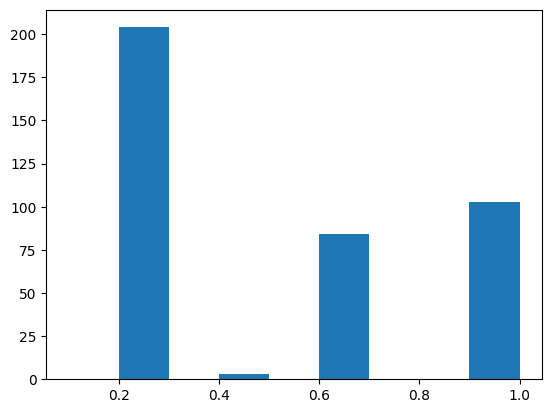

In [135]:
import matplotlib.pyplot as plt
custom_bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(normalized_df['cylinders'], bins=custom_bins)
plt.show()

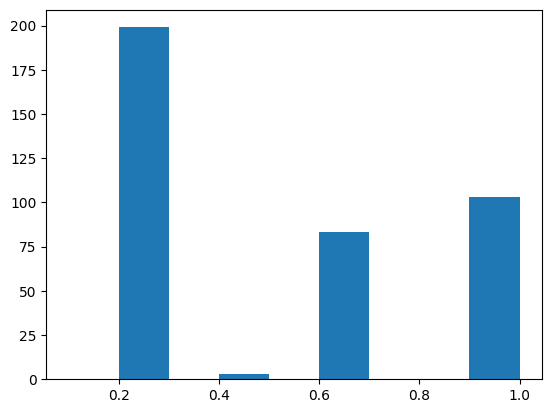

In [138]:
plt.hist(normalized_np[:, 2], bins=custom_bins)
plt.show()

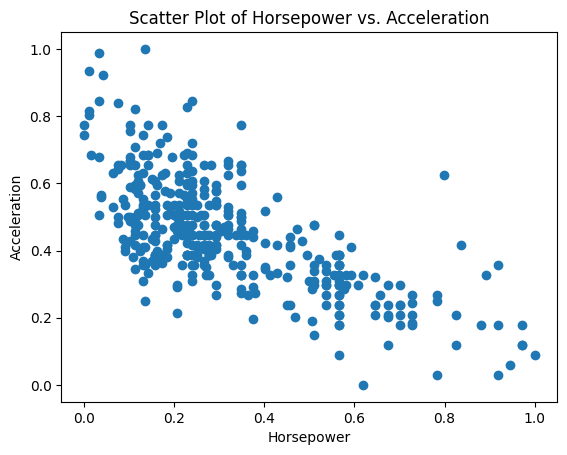

In [142]:

plt.scatter(data=df, x='horsepower', y='acceleration')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.title('Scatter Plot of Horsepower vs. Acceleration')
plt.show()

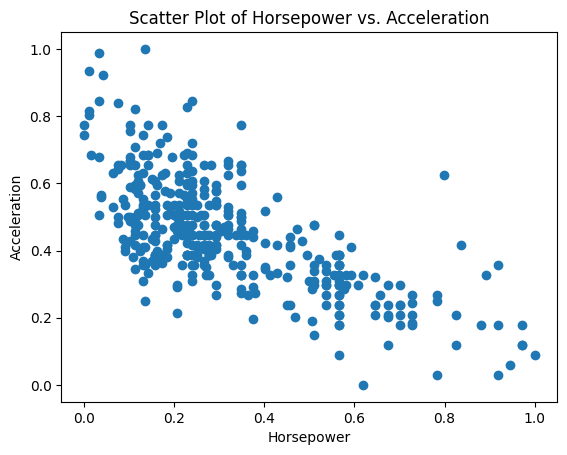

In [143]:
plt.scatter(x=normalized_np[:, 3], y=normalized_np[:, 5])
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.title('Scatter Plot of Horsepower vs. Acceleration')
plt.show()

In [144]:
import random
possible_values = ['A', 'B', 'C']

df['Letters'] = [random.choice(possible_values) for _ in range(len(df))]


encoded_df = pd.get_dummies(df['Letters'])

df_encoded = pd.concat([df, encoded_df], axis=1)

print(df_encoded)

                      car_name  displacement  cylinders  horsepower    weight  \
0    chevrolet,chevelle,malibu      0.617571        1.0    0.456522  0.536150   
1            buick,skylark,320      0.728682        1.0    0.646739  0.589736   
2           plymouth,satellite      0.645995        1.0    0.565217  0.516870   
3                amc,rebel,sst      0.609819        1.0    0.565217  0.516019   
4                  ford,torino      0.604651        1.0    0.510870  0.520556   
..                         ...           ...        ...         ...       ...   
393            ford,mustang,gl      0.186047        0.2    0.217391  0.333711   
394                  vw,pickup      0.074935        0.2    0.032609  0.146583   
395              dodge,rampage      0.173127        0.2    0.206522  0.193365   
396                ford,ranger      0.134367        0.2    0.179348  0.286929   
397                 chevy,s-10      0.131783        0.2    0.195652  0.313864   

     acceleration  model_ye

In [167]:


np_array = np.concatenate((np_array, np.array([random.choice(possible_values) for _ in range(len(np_array))]).reshape(-1, 1)), axis=1)


categories, inverse  = np.unique(np_array[:, 9], return_inverse=True)

one_hot = np.zeros((np_array[:, 9].size, categories.size))
one_hot[np.arange(np_array[:, 9].size), inverse] = 1
np_array = np.concatenate((np_array, one_hot), axis=1)
print(np_array)

[['chevrolet,chevelle,malibu' 0.6175710594315246 1.0 ... 1.0 0.0 0.0]
 ['buick,skylark,320' 0.7286821705426356 1.0 ... 0.0 1.0 0.0]
 ['plymouth,satellite' 0.6459948320413437 1.0 ... 0.0 0.0 1.0]
 ...
 ['dodge,rampage' 0.1731266149870801 0.2 ... 0.0 1.0 0.0]
 ['ford,ranger' 0.1343669250645995 0.2 ... 1.0 0.0 0.0]
 ['chevy,s-10' 0.13178294573643412 0.2 ... 0.0 0.0 1.0]]


Провести візуалізацію багатовимірних даних, використовуючи

приклади, наведені у медіумі

Text(0.5, 0, 'weight')

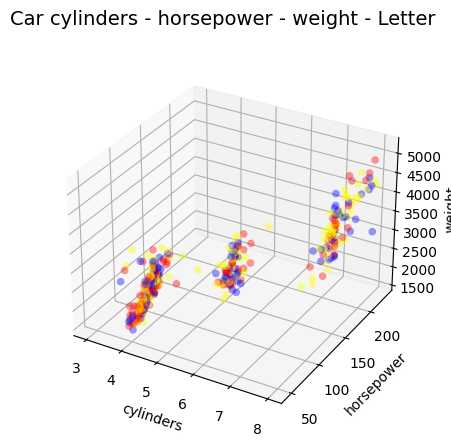

In [27]:
fig = plt.figure()
t = fig.suptitle('Car cylinders - horsepower - weight - Letter', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(df['cylinders'])
ys = list(df['horsepower'])
zs = list(df['weight'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if ct == 'A' else 'blue' if ct == 'B' else 'yellow' for ct in df['Letters']]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('cylinders')
ax.set_ylabel('horsepower')
ax.set_zlabel('weight')

Text(0.5, 0, 'weight')

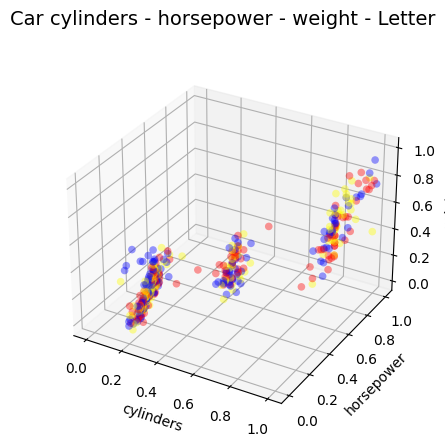

In [168]:
fig = plt.figure()
t = fig.suptitle('Car cylinders - horsepower - weight - Letter', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(np_array[:, 2])
ys = list(np_array[:, 3])
zs = list(np_array[:, 4])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if ct == 'A' else 'blue' if ct == 'B' else 'yellow' for ct in df['Letters']]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('cylinders')
ax.set_ylabel('horsepower')
ax.set_zlabel('weight')

Поділити випадковим чином датасет на дві рівні частини. Навчити 3
регресійні моделі на основі не менше одного атрибуту відновлювати
інший. Навчання має відбуватися на основі першого датасету (https://
scikit-learn.org/stable/modules/linear_model.html), візуалізувати моделі
та на основі середньої квадратичної помилки (https://scikit-learn.org/
stable/modules/generated/sklearn.metrics.mean_squared_error.html)
вибрати найкращу.

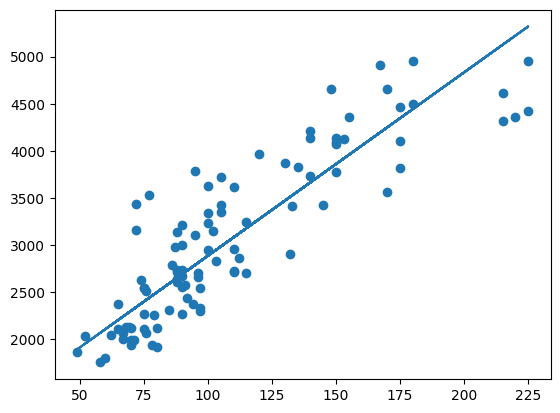

{LinearRegression(): 182010.07309852052}


In [28]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(df[['horsepower']], df['weight'])

lr = linear_model.LinearRegression()
train_errors = {}
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
train_errors[lr] = mean_squared_error(y_test, prediction)
plt.plot(x_test, prediction)
plt.scatter(x_test, y_test)
plt.show()
print(train_errors)

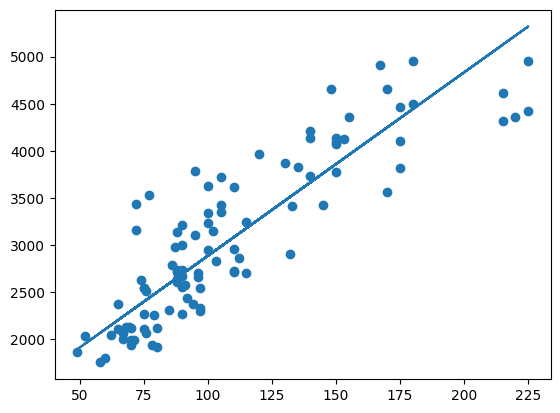

{LinearRegression(): 182010.07309852052, Ridge(alpha=0.5): 182009.96729957845}


In [29]:

rd = linear_model.Ridge(alpha=.5)
rd.fit(x_train, y_train)
prediction = rd.predict(x_test)
train_errors[rd] = mean_squared_error(y_test, prediction)
plt.plot(x_test, prediction)
plt.scatter(x_test, y_test)
plt.show()
print(train_errors)

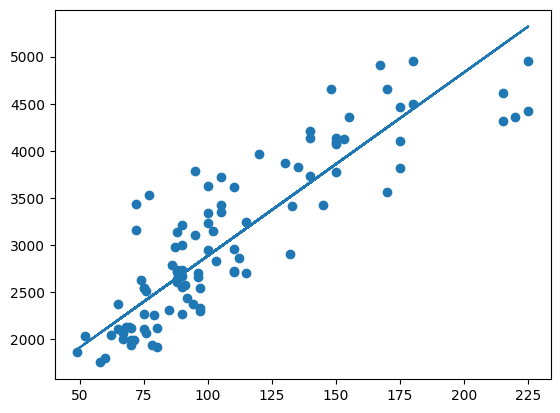

{LinearRegression(): 182010.07309852052, Ridge(alpha=0.5): 182009.96729957845, Lasso(alpha=0.1): 182009.753366613}


In [30]:
lo = linear_model.Lasso(alpha=0.1)
lo.fit(x_train, y_train)
prediction = lo.predict(x_test)
train_errors[lo] = mean_squared_error(y_test, prediction)
plt.plot(x_test, prediction)
plt.scatter(x_test, y_test)
plt.show()
print(train_errors)

In [31]:
print(min(train_errors, key=lambda k: train_errors[k]))

Lasso(alpha=0.1)
